In [3]:
import random

In [4]:
def insertionSort(arr):
    comparison = 0
    
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        while j >= 0 and arr[j] > key:
            comparison += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    
    return arr, comparison

In [5]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr, 0  # Return 0 comparisons for empty or single-element arrays
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left, left_comparisons = mergeSort(left)
    right, right_comparisons = mergeSort(right)
    
    merged, merge_comparisons = merge(left, right)
    
    return merged, left_comparisons + right_comparisons + merge_comparisons
 
def merge(left, right):
    result = []
    i = j = 0
    comparisons = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
        comparisons += 1  # Count each comparison
        
    
    result += left[i:]
    result += right[j:]
    
    return result, comparisons

In [6]:
def hybridSort(arr, S):
    mid = len(arr)//2
    if (len(arr) <= S):
        sorted_arr, comparisons = insertionSort(arr)
        return sorted_arr, comparisons
    else:
        left, left_comparisons = hybridSort(arr[:mid], S)
        right, right_comparisons = hybridSort(arr[mid:], S)
        merged, merge_comparisons = merge(left, right)
        return merged, left_comparisons + right_comparisons + merge_comparisons 

In [7]:
def generate_random_integers(n, min_val, max_val):
    randomlist = random.sample(range(min_val, max_val), n)
    return randomlist

In [8]:
def AvgTimeCmpMerge (n , nums):
    avgTime = 0
    avgCmp = 0

    for i in range (0,n):
        start_time = time.process_time()
        merged , cmp = mergeSort(nums[i])
        end_time = time.process_time()
        avgCmp += cmp
        avgTime += (end_time - start_time)
        
    
    return avgCmp/n , avgTime/n
             

In [9]:
def AvgTimeCmpHybrid (n , nums):
    avgTime = 0
    avgCmp = 0
    
    for i in range (0,n):
        start_time = time.process_time()
        hybrid , cmp = hybridSort(nums[i] , 10)
        end_time = time.process_time()
        avgCmp += cmp
        avgTime += (end_time - start_time)
    
    return avgCmp/n , avgTime/n

In [19]:
random_numbers = [generate_random_integers(10000000, 0, 10000000) for _ in range(5)]

In [20]:
import time
cmp_merge , time_merge = AvgTimeCmpMerge(5 , random_numbers)
print("Average number of comparison(merge):" , cmp_merge)
print("Average CPU time(merge):" , time_merge , "s")

Average number of comparison(merge): 220100488.8
Average CPU time(merge): 99.959375 s


In [21]:
import time
cmp_hybrid , time_hybrid = AvgTimeCmpHybrid(5 , random_numbers)
print("Average number of comparison(Hybrid):" , cmp_hybrid)
print("Average CPU time(hybrid):" , time_hybrid , "s")

Average number of comparison(Hybrid): 219443119.6
Average CPU time(hybrid): 82.675 s


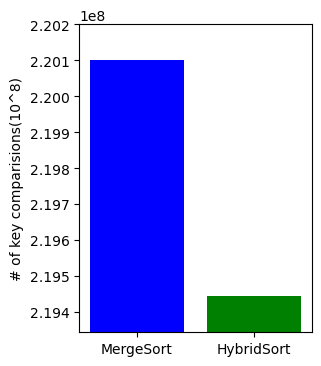

In [26]:
import matplotlib.pyplot as plt

categories = ['MergeSort', 'HybridSort']
values = [cmp_merge , cmp_hybrid]


plt.figure(figsize=(3, 4)) 
plt.bar(categories, values, color=['blue', 'green'])
y_min = cmp_hybrid - 100000
y_max = cmp_merge +  100000
plt.ylim(y_min, y_max)
# Add labels and title

#plt.title('Average number of key Comparisons - merge sort vs hybrid sort')
plt.ylabel('# of key comparisions(10^8)')
plt.show()

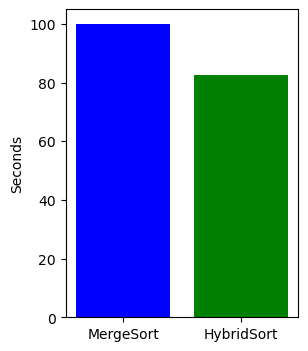

In [27]:
categories = ['MergeSort', 'HybridSort']
values = [time_merge , time_hybrid]


plt.figure(figsize=(3, 4)) 
plt.bar(categories, values, color=['blue', 'green'])


# Add labels and title
#plt.title('Average CPU time - merge sort vs hybrid sort')
plt.ylabel('Seconds')


plt.show()

In [31]:
print((cmp_merge - cmp_hybrid)/cmp_merge)
print((time_merge - time_hybrid)/time_merge)

0.0029866776015993013
0.17291399631100132
